In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
#import warnings
#warnings.filterwarnings('ignore')

Import our Data

In [2]:
train = pd.read_csv(r'C:\Users\SUNKANMI\Desktop\Kaggle\Housing Prices - Advanced Regression techniques\data\train.csv')
train.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

This is a regression problem, what we're trying to predict is the SalesPrice, so lets take a look at it!

In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\SUNKANMI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


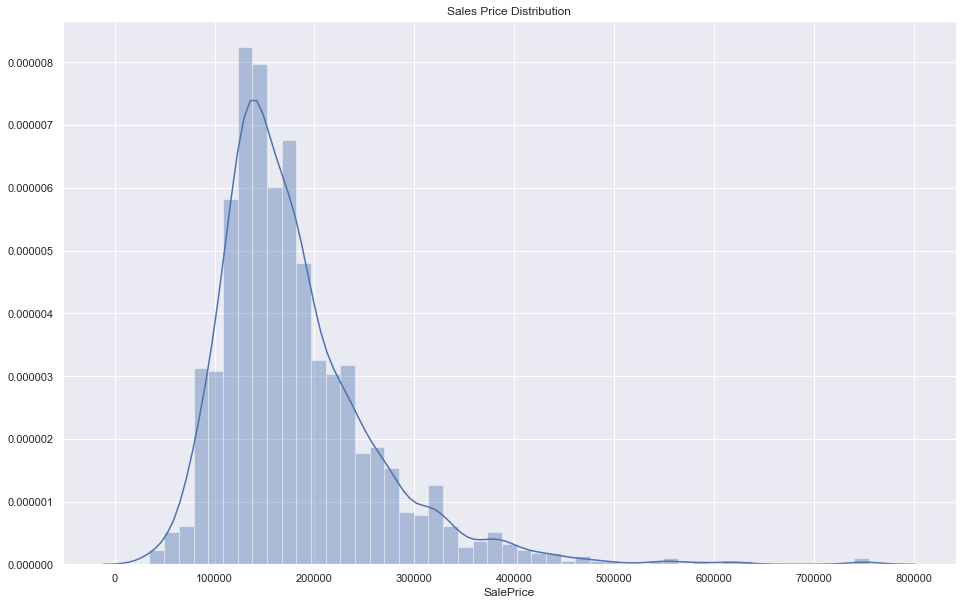

In [5]:
plt.figure(figsize=(16, 10))
plt.title('Sales Price Distribution')
sns.distplot(train['SalePrice']);

From our distribution plot above, we can see that we have a peaked distribution that is not normal with positive skewness!

Therefore, before performing regression, our data has to be transformed, a logrithimic transformation should suffice.

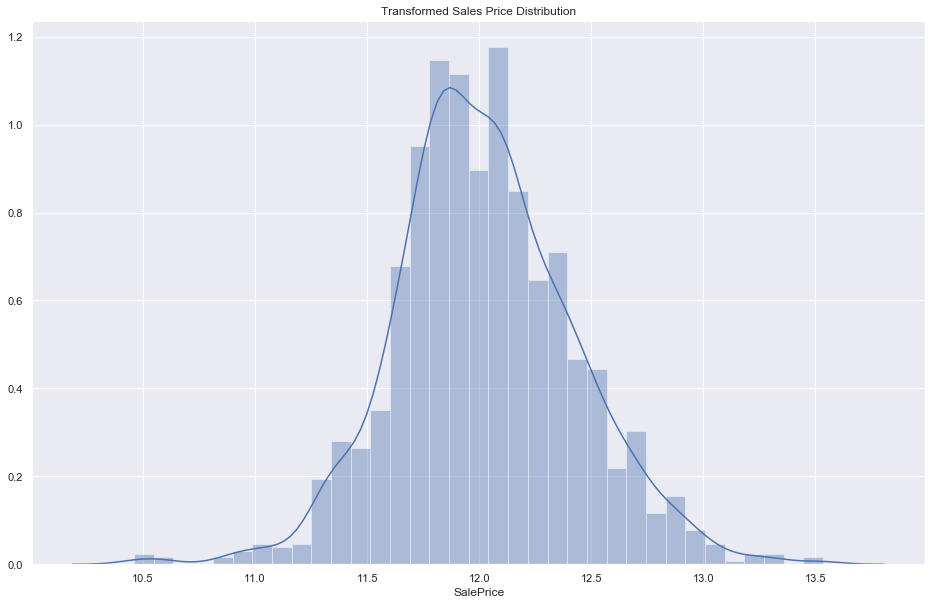

In [6]:
target = np.log1p(train.SalePrice)

plt.figure(figsize=(16, 10))
plt.title('Transformed Sales Price Distribution')
sns.distplot(target);

Lets examine our numerical features!

In [7]:
num_feats = train.select_dtypes(include=[np.number])
print(num_feats.shape)
num_feats.columns

(1460, 38)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Now for the categorical features

In [8]:
cate_feats = train.select_dtypes(include=[np.object])
print(cate_feats.shape)
cate_feats.columns

(1460, 43)


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Data Exploration

**Correlation with Numerical features and SalesPrice**

In [9]:
num_corr = num_feats.corr()
print(num_corr['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Lets better visualize the correlation between the more highly correlated features and **SalePrice**

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


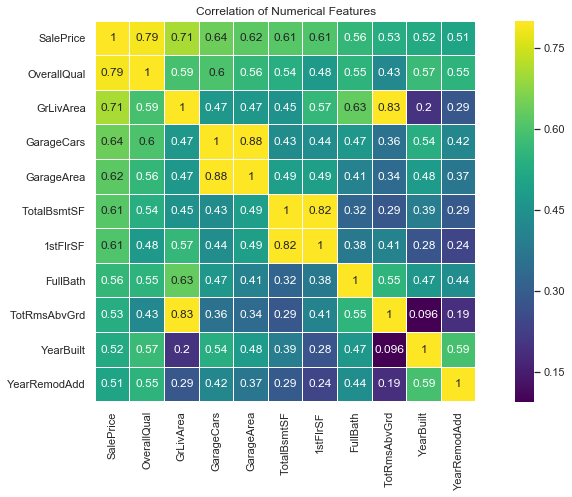

In [10]:
k= 11 #all correlations that are 0.5 and above
cols = num_corr.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
data = np.corrcoef(train[cols].values.T)
plt.figure(figsize=(14, 7))
plt.title('Correlation of Numerical Features')
sns.heatmap(data, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            xticklabels=cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

From the above heatmap, we can see that some other features are highly correlated with one another. 

1. **TotalBsmtSF** and **1stFlrSF**, 
2. **GarageArea** and **GarageCars**, 
3. **TotRmsAbvGrd** and **GrLivArea**

**SCATTERPLOT**

A scatterplot can help us better visualise the correlation between SalePrice and its most correlated features and help us identify outliers if any!

Due to the high correlation observed between some features, we'll be using those that have a higher correlation with **SalePrice**. 
For example, we'll use **GrLivArea** and not **TotRmsAbvGrd** since they're both highly correlated with each but the former is better correlated with **SalePrice**

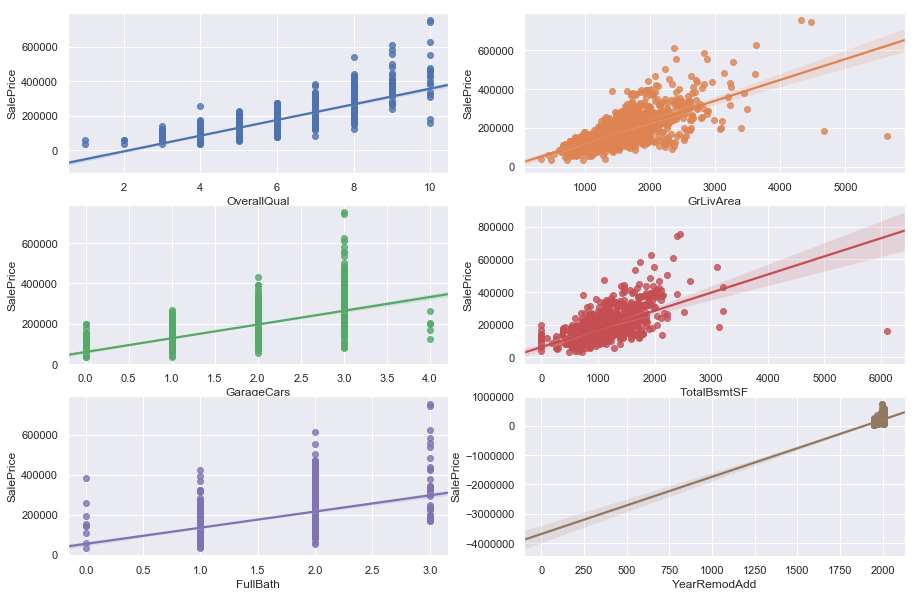

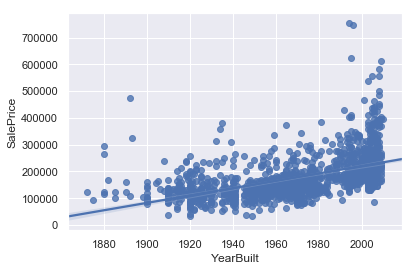

In [11]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(nrows=3,ncols=2,figsize=(15, 10))

sns.regplot(x='OverallQual', y='SalePrice', data=train, ax=ax1)

sns.regplot(x='GrLivArea', y='SalePrice', data=train, ax=ax2)

sns.regplot(x='GarageCars', y='SalePrice', data=train, ax=ax3)

sns.regplot(x='TotalBsmtSF', y='SalePrice', data=train, ax=ax4)

sns.regplot(x='FullBath', y='SalePrice', data=train, ax=ax5)

sns.regplot(x='YearRemodAdd', y='SalePrice', data=train, ax=ax6)

plt.show()

sns.regplot(x='YearBuilt', y='SalePrice', data=train)

It would seem as though our features exhibit a linear relationship with the **SalePrice** and we can observe outliers in **GrLivArea** and **TotalBsmtSF** scatter plots, we'll deal with those later.

**Categorical features**

First, lets take a look at how many null values are in our categorical features

In [12]:
cate_null = cate_feats.isnull().sum().sort_values(ascending=False)
null_percent = (cate_feats.isnull().sum()/cate_feats.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([cate_null, null_percent], axis=1, keys=['Total Null Values', 'Percentage'])

missing_data.head(20)

,Total Null Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945
BsmtFinType2,38,2.602740


From the decription, we know that if some features have "nan" values, it means that the said feature doesn't exist for the corresponding observation. Therfore, we can replace said "nan" values with "None".
But for the features with more than 10% missing values, we'll probably just drop them, they most likely wont impact our model in anyway.

In [13]:
dropped = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
cate_feats.drop(labels=dropped, axis=1, inplace=True)
cate_feats.shape

C:\Users\SUNKANMI\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1460, 38)

In [14]:
# Since Electrical has just one null value...
cate_feats.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [15]:
train.GarageCond = cate_feats['GarageCond'].fillna(value='None', inplace=True)
train.GarageQual = cate_feats['GarageQual'].fillna(value='None', inplace=True)
train.GarageFinish = cate_feats['GarageFinish'].fillna(value='None', inplace=True)
train.GarageType = cate_feats['GarageType'].fillna(value='None', inplace=True)
train.BsmtFinType2 = cate_feats['BsmtFinType2'].fillna(value='None', inplace=True)
train.BsmtExposure = cate_feats['BsmtExposure'].fillna(value='None', inplace=True)
train.BsmtQual = cate_feats['BsmtQual'].fillna(value='None', inplace=True)
train.BsmtFinType1 = cate_feats['BsmtFinType1'].fillna(value='None', inplace=True)
train.BsmtCond = cate_feats['BsmtCond'].fillna(value='None', inplace=True)
train.MasVnrType = cate_feats['MasVnrType'].fillna(value='None', inplace=True)
train.Electrical = cate_feats['Electrical'].fillna(value='SBrkr', inplace=True)

C:\Users\SUNKANMI\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Lets see if all our categorical features have unique values

In [16]:
unique_list=[]
for column in cate_feats.columns:
    no_of_unique = len(cate_feats[column].unique())
    unique_list.append(no_of_unique)
    print("The '{a}' column has {b} unique values".format(a=column, b=no_of_unique))
print("Total number of categories with unique values is {c}".format(c=len(unique_list)))

The 'MSZoning' column has 5 unique values
The 'Street' column has 2 unique values
The 'LotShape' column has 4 unique values
The 'LandContour' column has 4 unique values
The 'Utilities' column has 2 unique values
The 'LotConfig' column has 5 unique values
The 'LandSlope' column has 3 unique values
The 'Neighborhood' column has 25 unique values
The 'Condition1' column has 9 unique values
The 'Condition2' column has 8 unique values
The 'BldgType' column has 5 unique values
The 'HouseStyle' column has 8 unique values
The 'RoofStyle' column has 6 unique values
The 'RoofMatl' column has 8 unique values
The 'Exterior1st' column has 15 unique values
The 'Exterior2nd' column has 16 unique values
The 'MasVnrType' column has 4 unique values
The 'ExterQual' column has 4 unique values
The 'ExterCond' column has 5 unique values
The 'Foundation' column has 6 unique values
The 'BsmtQual' column has 5 unique values
The 'BsmtCond' column has 5 unique values
The 'BsmtExposure' column has 5 unique values


Looking at the categories, the most likely to have an effect on price would be the neighborhood in which they are situated
Now, we'll visualize the correlation between **Neighborhood** and our **SalePrice**

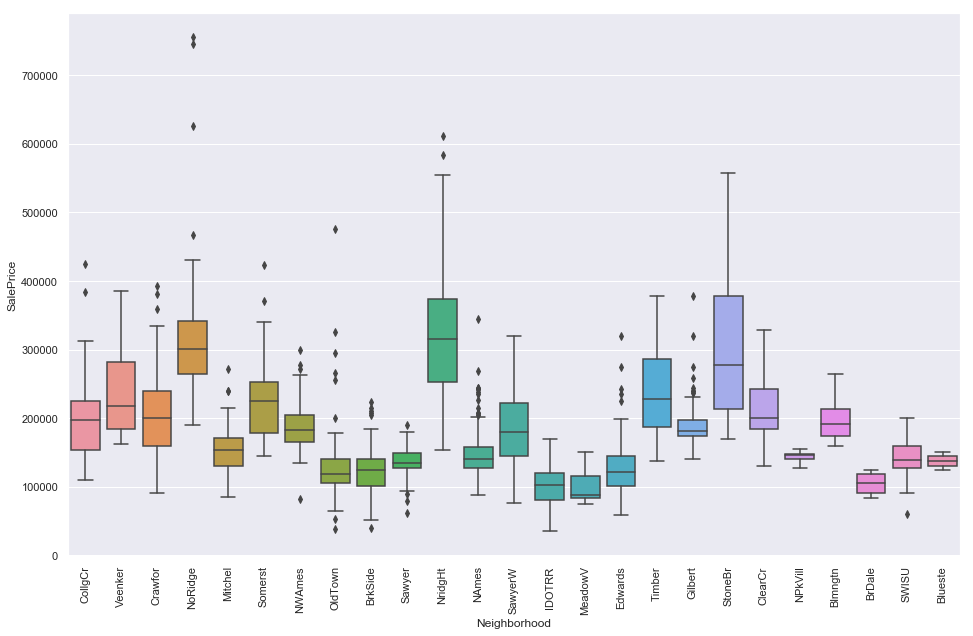

In [17]:
plt.figure(figsize=(16, 10))
plt.xticks(rotation=90)
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)

# Feature Selection

After exploring our training data extensively, we can finally select the features deemed most important for our final training feature matrix.

In [18]:
bbb = ['Id','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearRemodAdd', 'YearBuilt', 'SalePrice']
num_feats = num_feats[bbb]
num_feats.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearRemodAdd,YearBuilt,SalePrice
0,1,7,1710,2,856,2,2003,2003,208500
1,2,6,1262,2,1262,2,1976,1976,181500
2,3,7,1786,2,920,2,2002,2001,223500
3,4,7,1717,3,756,1,1970,1915,140000
4,5,8,2198,3,1145,2,2000,2000,250000


In [19]:
train_data = pd.concat([num_feats, cate_feats], axis=1)
train_data.shape

(1460, 47)

**Removing Outliers**

From our data exploration, we remember that the features  **GrLivArea** and **TotalBsmtSF** had outliers, lets sort those out!

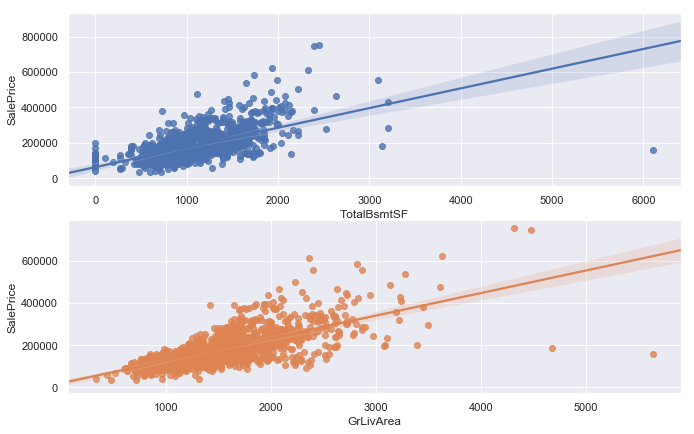

In [20]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2,ncols=1,figsize=(11, 7))

sns.regplot(x='TotalBsmtSF', y='SalePrice', data=train_data, ax=ax1)

sns.regplot(x='GrLivArea', y='SalePrice', data=train_data, ax=ax2)

In [21]:
train_data = train_data.drop(train_data[train_data['GrLivArea'] > 4500].index)
train_data = train_data.drop(train_data[train_data['TotalBsmtSF'] > 6000].index)
train_data.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearRemodAdd,YearBuilt,SalePrice,MSZoning,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,7,1710,2,856,2,2003,2003,208500,RL,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,6,1262,2,1262,2,1976,1976,181500,RL,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,7,1786,2,920,2,2002,2001,223500,RL,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,7,1717,3,756,1,1970,1915,140000,RL,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,8,2198,3,1145,2,2000,2000,250000,RL,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


**Test Data**

In [22]:
cols = list(train_data.columns)
print(cols[8])
cols.pop(8)
cols[:10]

SalePrice


['Id',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearRemodAdd',
 'YearBuilt',
 'MSZoning',
 'Street']

In [23]:
test_data = pd.read_csv(r'C:\Users\SUNKANMI\Desktop\Kaggle\Housing Prices - Advanced Regression techniques\data\test.csv', usecols=cols)[cols]
print(test_data.shape)
test_data.head()

(1459, 46)


,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearRemodAdd,YearBuilt,MSZoning,Street,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1461,5,896,1.0,882.0,1,1961,1961,RH,Pave,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,1462,6,1329,1.0,1329.0,1,1958,1958,RL,Pave,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,1463,5,1629,2.0,928.0,2,1998,1997,RL,Pave,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,1464,6,1604,2.0,926.0,2,1998,1998,RL,Pave,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,1465,8,1280,2.0,1280.0,2,1992,1992,RL,Pave,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [24]:
null_test = test_data.isnull().sum().sort_values(ascending=False)
percentage = (test_data.isnull().sum()/test_data.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([null_test, percentage], axis=1, keys=['Total Null Values', 'Percentage'])

missing_data.head(20)

,Total Null Values,Percentage
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127
GarageType,76,5.209047
BsmtCond,45,3.084304
BsmtExposure,44,3.015764
BsmtQual,44,3.015764
BsmtFinType2,42,2.878684
BsmtFinType1,42,2.878684
MasVnrType,16,1.096642


In [25]:
#Replacing the higher missing values with "None" as specified by the documentation.
test_data.GarageCond.fillna(value='None', inplace=True)
test_data.GarageQual.fillna(value='None', inplace=True)
test_data.GarageFinish.fillna(value='None', inplace=True)
test_data.GarageType.fillna(value='None', inplace=True)
test_data.BsmtFinType2.fillna(value='None', inplace=True)
test_data.BsmtExposure.fillna(value='None', inplace=True)
test_data.BsmtQual.fillna(value='None', inplace=True)
test_data.BsmtFinType1.fillna(value='None', inplace=True)
test_data.BsmtCond.fillna(value='None', inplace=True)
test_data.MasVnrType.fillna(value='None', inplace=True)

#Replacing the low missing values with the most common.
test_data.Exterior1st.fillna(value=test_data.Exterior1st.value_counts().idxmax(), inplace=True)
test_data.TotalBsmtSF.fillna(value=test_data.TotalBsmtSF.median(), inplace=True)
test_data.Exterior2nd.fillna(value=test_data.Exterior2nd.value_counts().idxmax(), inplace=True)
test_data.SaleType.fillna(value=test_data.SaleType.value_counts().idxmax(), inplace=True)
test_data.KitchenQual.fillna(value=test_data.KitchenQual.value_counts().idxmax(), inplace=True)
test_data.GarageCars.fillna(value=test_data.GarageCars.median(), inplace=True)
test_data.Utilities.fillna(value=test_data.Utilities.value_counts().idxmax(), inplace=True)
test_data.Functional.fillna(value=test_data.Functional.value_counts().idxmax(), inplace=True)
test_data.MSZoning.fillna(value=test_data.MSZoning.value_counts().idxmax(), inplace=True)

**Encoding Categorical Variables**

In [26]:
a = train_data.select_dtypes(include=[np.object])
cols_list = list(a.columns)
train = train_data
test = test_data

In [27]:
from sklearn.preprocessing import LabelEncoder
train[cols_list] = train[cols_list].apply(LabelEncoder().fit_transform)
test[cols_list] = test[cols_list].apply(LabelEncoder().fit_transform)

train.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearRemodAdd,YearBuilt,SalePrice,MSZoning,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,7,1710,2,856,2,2003,2003,208500,3,...,4,2,6,1,2,5,5,2,8,4
1,2,6,1262,2,1262,2,1976,1976,181500,3,...,4,3,6,1,2,5,5,2,8,4
2,3,7,1786,2,920,2,2002,2001,223500,3,...,4,2,6,1,2,5,5,2,8,4
3,4,7,1717,3,756,1,1970,1915,140000,3,...,4,2,6,5,3,5,5,2,8,0
4,5,8,2198,3,1145,2,2000,2000,250000,3,...,4,2,6,1,2,5,5,2,8,4


In [28]:
test.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearRemodAdd,YearBuilt,MSZoning,Street,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1461,5,896,1.0,882.0,1,1961,1961,2,1,...,3,3,6,1,3,4,5,2,8,4
1,1462,6,1329,1.0,1329.0,1,1958,1958,3,1,...,3,2,6,1,3,4,5,2,8,4
2,1463,5,1629,2.0,928.0,2,1998,1997,3,1,...,3,3,6,1,0,4,5,2,8,4
3,1464,6,1604,2.0,926.0,2,1998,1998,3,1,...,3,2,6,1,0,4,5,2,8,4
4,1465,8,1280,2.0,1280.0,2,1992,1992,3,1,...,3,2,6,1,2,4,5,2,8,4


# Model Selection and Training

Lets import our tools for training and predictions

In [79]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin

**Train-test split**

In [30]:
X = train.drop(['Id', 'SalePrice'], axis=1)
y = np.log1p(train.SalePrice)
z = test.drop(['Id'], axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We'll scale the data using the **RobustScaler** module or **StandardScaler** to improve predictions basically!

In [32]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#scale the prediction data
pred_test = scaler.transform(z)

**Linear Regression**

In [57]:
Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)
Linear_pred = Linear_reg.predict(X_test)
Linear_mse = np.sqrt(mean_squared_error(y_test, Linear_pred))
Linear_r2 = r2_score(y_test, Linear_pred)

print('The Linear model has a root mean squared error of: {}'.format(Linear_mse))
print('The Linear model has an r2 score of: {}'.format(Linear_r2))

The Linear model has a root mean squared error of: 0.12588601515877415
The Linear model has an r2 score of: 0.9064904600537877


In [58]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

**Ridge**

In [59]:
ridge = Ridge()
param_ridge = {'alpha': [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]}
ridge_model = GridSearchCV(ridge, param_ridge, cv=kfolds, n_jobs=2)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)

{'alpha': 14.5}


In [60]:
ridge_model = ridge_model.best_estimator_
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

print('The Ridge model has a root mean squared error of: {}'.format(ridge_mse))
print('The Ridge model has an r2 score of: {}'.format(ridge_r2))

The Ridge model has a mean squared error of: 0.12533952704059428
The Ridge model has an r2 score of: 0.9073005727965948


**Lasso**

In [61]:
lasso = Lasso(max_iter=1e7, random_state=42)
param_lasso = {'alpha': [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]}
lasso_model = GridSearchCV(lasso, param_lasso, cv=kfolds, n_jobs=2)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)

{'alpha': 0.0008}


In [62]:
lasso_model = lasso_model.best_estimator_
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

print('The Lasso model has a root mean squared error of: {}'.format(lasso_mse))
print('The Lasso model has an r2 score of: {}'.format(lasso_r2))

The Lasso model has a root mean squared error of: 0.12484050799131126
The Lasso model has an r2 score of: 0.9080372389576651


**SVR**

In [72]:
svr_model = SVR(C= 20, epsilon= 0.001, gamma=0.0009)
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_r2 = r2_score(y_test, svr_pred)

print('The SVR model has a root mean squared error of: {}'.format(svr_mse))
print('The SVR model has an r2 score of: {}'.format(svr_r2))

The SVR model has a root mean squared error of: 0.12121320300032784
The SVR model has an r2 score of: 0.9133036522757219


**ElasticNet**

In [73]:
elastic_net = ElasticNet(max_iter=1e7, random_state=42)
param_enet = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007],
              'l1_ratio': [0.8, 0.85, 0.9, 0.95, 0.99, 1]}
enet_model = GridSearchCV(elastic_net, param_enet, cv=5, n_jobs=2)
enet_model.fit(X_train, y_train)
print(enet_model.best_params_)

{'alpha': 0.0007, 'l1_ratio': 1}


In [74]:
enet_model = enet_model.best_estimator_
enet_model.fit(X_train, y_train)
enet_pred = enet_model.predict(X_test)
enet_mse = np.sqrt(mean_squared_error(y_test, enet_pred))
enet_r2 = r2_score(y_test, enet_pred)

print('The ElasticNet model has a root mean squared error of: {}'.format(enet_mse))
print('The ElasticNet model has an r2 score of: {}'.format(enet_r2))

The ElasticNet model has a root mean squared error of: 0.12486745482653079
The ElasticNet model has an r2 score of: 0.9079975343320167


**Gradient Boosting Regressor**

In [75]:
gboost_model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, 
                                         max_features='sqrt', min_samples_leaf=15, min_samples_split=10, 
                                         loss='huber', random_state =42)
gboost_model.fit(X_train, y_train)
gboost_pred = gboost_model.predict(X_test)
gboost_mse = np.sqrt(mean_squared_error(y_test, gboost_pred))
gboost_r2 = r2_score(y_test, gboost_pred)

print('The Gradient Boosting Regressor has a root mean squared error of: {}'.format(gboost_mse))
print('The Gradient Boosting Regressor has an r2 score of: {}'.format(gboost_r2))

The Gradient Boosting Regressor has a root mean squared error of: 0.12210446188846882
The Gradient Boosting Regressor has an r2 score of: 0.9120240398129115


# Stacking Models

In [85]:
class StackModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [x for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [86]:
stack_model = StackModels(models= (gboost_model, svr_model, enet_model, lasso_model))

stack_model.fit(X_train, y_train)
stack_pred = stack_model.predict(X_test)
stack_mse = np.sqrt(mean_squared_error(y_test, stack_pred))
stack_r2 = r2_score(y_test, stack_pred)

print('The Stacked Model has a root mean squared error of: {}'.format(stack_mse))
print('The Stacked Model has an r2 score of: {}'.format(stack_r2))

The Stacked Model has a root mean squared error of: 0.11776851663537144
The Stacked Model has an r2 score of: 0.918161180304978


# Predictions and Submission

In [87]:
target = stack_model.predict(pred_test)
predictions = np.exp(target)

submission = pd.DataFrame({'Id': test['Id'],
                          'SalePrice': predictions})


In [89]:
submission.to_csv('Submission_stack.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,113498.542548
1,1462,162633.609640
2,1463,176499.618279
3,1464,187500.113180
4,1465,196556.842576


In [69]:
SVR?